此篇文章主要介绍了如何获得一颗最优的决策树

关键思想：要构建一棵完美的树，你需要在信息量最大的特征处拆分树，从而得到最纯的子节点
criterion='gini'：基尼不纯度是一种误分类的度量，目标是最小化误分类的概率。数据的完美拆分（每个子组包含一个目标标签的数据点）产生的基尼系数为0。我们可以度量树的每种可能拆分的基尼系数，然后选择基尼不纯度最低的那个。它常用于分类和回归树.
criterion='entropy'（也称为信息增益）：在信息论中，熵是与信号或者分布相关的不确定量的度量。一个完美的数据拆分熵为0。我们可以度量树的每种可能拆分的熵，然后选择熵最低的那个.

关于决策树：
优点
    天然的可解释性。 这是决策树最大的优点了,常用于医学等需要可解释性强的分类器
    可以处理缺失值（missing）， 字符型（nominal）， 数值型（numeric）等数据类型。
    非参数模型（non-parametric）。 没有复杂的参数设置，谁跑效果都相对一样。
    运算速度相对比较快.

缺点
    最大的缺点就是很容易过拟合。 导致实际预测的效果并不高。
    不适合处理高维数据， 当属性数量过大的时候,决策树相当复杂
    对异常值（Outlier）过于敏感， 很容易导致树的结构的巨大的变换。
    泛化（Generalization）能力太差， 对于没有出现过的值几乎没有办法分类,鲁棒性差


控制决策树的复杂度
你继续生成一棵树，直到所有的叶子节点都是纯的，那么通常你会得到一棵过于复杂且无法解释的树
纯叶子节点的出现意味着这棵树是100%正确的,也就是过拟合le


决策树避免过拟合有两种常见的方法：
    1.先减枝,也就是提前停止树的创建过程
    2.后减枝,也就是树形成后再删除或者折叠包含少量信息的节点


1.先减枝：DecisionTreeclassifier
    传入参数.
    1.max_depth 限制树的最大深度
    2.max_leaf_nodes 限制叶子节点的最大数量
    3.min_samples_splits 继续拆分节点所需要的节点中最少点数

项目实战：使用决策树诊断乳腺癌
    乳腺癌Wisconsin数据集
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ (Diagnostic)
    sklearn 中 load_breast_cancer

In [1]:
'''初始化与数据集加载'''
from sklearn import datasets
from sklearn import  tree
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt

# breast_cancer.data.shape #(569, 30)  569张图的30个特征
# breast_cancer.feature_names.shape #(30,) 30个特征
breast_cancer= datasets.load_breast_cancer()
feature_names = breast_cancer.feature_names
target,Data = breast_cancer.target,breast_cancer.data
target_names = breast_cancer.target_names
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
xTrain,xTest,yTrain,yTest = sklearn.model_selection.train_test_split(Data,target,test_size=0.1,random_state=7)
cancer_dtree = tree.DecisionTreeClassifier()
cancer_dtree.fit(xTrain,yTrain)

with open('Dot/cancer_dtree1.dot','w') as f:
    tree.export_graphviz(cancer_dtree,f,feature_names = feature_names,class_names = target_names)



这棵树的特征分布不平衡,balance tree,左子树深度为7,右子树为5

目前问题如下：
    非对称树意味着什么？
    树的深度可能导致过拟合,对于两个相同性能的树,我们偏向于depth小的
    决策树只不过是在不同的特征上执行一组分层逻辑运算，以产生一个预测

In [11]:
print(cancer_dtree.score(xTest,yTest))

0.9473684210526315


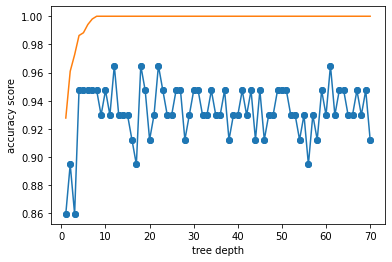

In [12]:
'''探索  树的深度  对于性能的影响'''
max_depths = np.arange(1,71,1)
train_score = []
test_score = []
for index,data in enumerate(max_depths):
    dtree = tree.DecisionTreeClassifier(max_depth=data)
    dtree.fit(xTrain,yTrain)
    train_score.append(dtree.score(xTrain,yTrain))
    test_score.append(dtree.score(xTest,yTest))
plt.plot(max_depths,test_score,'o-',label ='test' )
plt.plot(max_depths,train_score,label ='train' )
plt.scatter(max_depths,test_score)
plt.xlabel('tree depth')
plt.ylabel('accuracy score')
plt.show()

从结果上看似乎树越深,模型的效果越好
但是,树的深度可能导致过拟合,对于两个相同性能的树,我们偏向于depth小的
depth 取 17

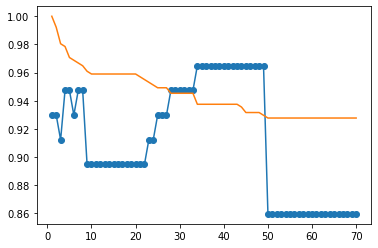

In [13]:
'''探索 限制叶子节点的容量最小值  对性能的影响'''
min_samples = np.arange(1,71,1) #min_samples_leaf
train_score1 = []
test_score1 = []
for index,data in enumerate(min_samples):
    dtree = tree.DecisionTreeClassifier(min_samples_leaf = data)
    dtree.fit(xTrain,yTrain)
    train_score1.append(dtree.score(xTrain,yTrain))
    test_score1.append(dtree.score(xTest,yTest))
plt.plot(min_samples,test_score1,label ='test' )
plt.plot(min_samples,train_score1,label ='train' )
plt.scatter(min_samples,test_score1)
plt.show()

从上图中我们可以看到,min_samples_leaf限制在 40左右会有最优值

In [14]:
'''得出我们的最优参数模型
max_depth = 17
min_samples_leaf = 40'''
dtree_best = tree.DecisionTreeClassifier(min_samples_leaf=40,max_depth=17)
dtree_best.fit(xTrain,yTrain)
dtree_best.score(xTest,yTest)
with open('Dot/bestDot/best_cancer_dtree.dot','w') as f:
    tree.export_graphviz(dtree_best,f,feature_names = feature_names,class_names = target_names)

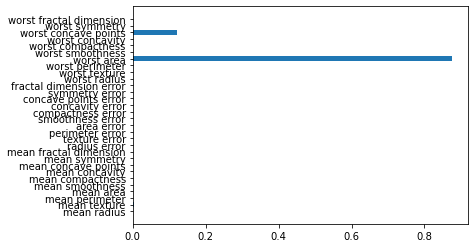

In [16]:
'''最重要的特征'''
dtree_best_importance = dtree_best.feature_importances_

plt.barh(range(len(feature_names)),dtree_best_importance,tick_label = feature_names)
plt.show()

从上图可以看到,乳腺癌 良性或者恶性最根本的判别特征是 worst area 和worst concave points

In [4]:
import numpy as np
x = np.arange(1,60,1)

x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])